### Load libraries

In [1]:
%load_ext autoreload
%autoreload 2

Imports

In [2]:
import numpy as np
import numba as nb
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mpmath as mp



# 1. Structural connectivity matrix
### 1.1 Read data: 

3 columns: i j value

In [3]:
# Read .dat file
Npopulations = int(np.loadtxt('sc2017.dat',max_rows=1))
data_np = np.loadtxt('sc2017.dat',skiprows=1)

# Show data
print(data_np)

[[0.00000e+00 1.00000e+00 1.52710e-01]
 [0.00000e+00 2.00000e+00 8.87115e-04]
 [0.00000e+00 3.00000e+00 2.05747e-01]
 ...
 [8.90000e+01 8.60000e+01 2.38328e-01]
 [8.90000e+01 8.70000e+01 5.19288e-04]
 [8.90000e+01 8.80000e+01 2.52918e-01]]


In [4]:
Npopulations

90

In [5]:
data_np.shape

(7936, 3)

In [6]:
data_np[7935,2]

np.float64(0.252918)

In [66]:
np.sum(data_np[89:2*90-1,2])

np.float64(2.7187855630000004)

### 1.2. Row sums

In [7]:
matrix_data = np.zeros((Npopulations, Npopulations))

# Fill matrix from data
row_sum=0
for i, j, value in data_np:
    if j==0:
        print(row_sum)
        row_sum=0
    row_sum += value
    #print(['row: ', str(i)])
    #print(['column: ', str(j)])
    matrix_data[int(i), int(j)] = value
print(row_sum)

2.135569034300001
2.7168407130000003
4.287906437999999
1.9517538730000008
3.2675687799999995
2.9397337253000004
2.6229685269000007
3.2431467629999986
3.0468473519999986
2.8056398535000002
5.556481701999998
3.2544922119999984
4.498511389999998
5.200742382
3.3834651442999983
3.862130161999999
2.9140278807000004
5.314757512
4.275250477999997
4.423812229
5.1589509304
4.2138826608
4.023765818500001
3.9695608269999973
3.7425768756999997
2.697892672
3.047682464000001
3.147306480999999
2.273671553799999
2.9509600099999997
2.5350930443000004
2.5193839285999977
2.4171218398000005
3.7950161359999983
2.5966418178
3.589982798
3.5737842239999997
3.5126180050000007
3.0394977819999993
3.156482328000002
2.464601576400001
3.422616305
2.3257677276999993
4.097096367999999
2.7898778560000004
2.572138569600001
3.6581653129999996
2.428929642100001
3.375169961
2.6935343672000007
3.540159267
3.093636598
3.823430263
3.677488564
3.291987578
3.137322427000001
3.6539850410000003
2.7828143867
2.7133631513000007
3.1

In [71]:
matrix_data[89,88]

np.float64(0.252918)

In [74]:
np.sum(matrix_data[89,:])

np.float64(2.57203249)

In [9]:
matrix_data.shape

(90, 90)

In [10]:
vaps, veps = np.linalg.eig(matrix_data)

In [19]:
veps[:,1]

array([ 3.64992365e-02,  6.40251014e-02,  2.22963013e-01,  4.10948603e-02,
        1.31586540e-01,  7.24831666e-02,  6.64107038e-02,  1.29873068e-01,
        7.81100982e-02,  4.61049215e-02,  3.12940132e-01,  8.70098517e-02,
        2.71618936e-01,  3.09301349e-01,  1.09553457e-01,  1.44289078e-01,
        1.98076487e-02, -1.48390299e-01,  2.57344166e-02,  4.65042629e-02,
        1.49794292e-01, -8.90958698e-02, -1.09771248e-01, -2.94100505e-03,
       -8.46288001e-02,  1.65699644e-04,  2.84662175e-02,  4.76678136e-02,
        2.71464669e-02, -1.02422214e-02,  2.54654708e-02,  4.65760546e-02,
        3.18186106e-02, -7.35030050e-02,  1.06647827e-02,  1.01649868e-01,
        8.27459844e-02,  7.65701831e-02,  3.75421551e-02,  7.01999139e-02,
        5.33682976e-02,  1.16845218e-01,  5.22627187e-02,  1.23596497e-01,
        6.18464236e-02, -5.85634390e-02, -5.02789515e-02, -5.33381011e-02,
       -3.22271647e-02, -5.31336008e-02, -6.46319949e-02, -2.81687630e-02,
       -2.91688558e-02, -

Number of elements in structural connectivity matrix

In [10]:
matrix_data.size

8100

Shape of structural connectivity matrix

In [11]:
matrix_data.shape

(90, 90)

Check if structure is correct

In [12]:
matrix_data[88,:]

array([3.12210e-02, 1.56089e-01, 1.76836e-02, 6.00904e-02, 7.53450e-03,
       6.06473e-03, 1.64305e-02, 3.24896e-03, 1.62448e-03, 1.20861e-01,
       6.79188e-03, 1.58488e-01, 1.38468e-02, 3.54292e-03, 7.10131e-03,
       5.57429e-02, 3.61563e-02, 3.63574e-03, 4.02253e-03, 4.79609e-04,
       9.43747e-04, 2.55276e-03, 1.06752e-03, 1.34600e-03, 1.00563e-03,
       2.28975e-03, 6.03379e-04, 8.19976e-04, 6.04926e-03, 3.07878e-03,
       1.65542e-03, 6.80735e-04, 1.31506e-03, 9.12804e-03, 2.42744e-02,
       1.66935e-02, 1.78538e-02, 1.07525e-02, 2.03911e-02, 2.47540e-04,
       5.72436e-04, 7.73563e-04, 1.23770e-03, 7.73563e-04, 1.42336e-03,
       7.79751e-03, 3.31085e-03, 1.24544e-02, 4.39384e-03, 8.60202e-03,
       2.28975e-03, 6.06009e-02, 8.75673e-02, 1.52005e-01, 3.66978e-02,
       8.09147e-03, 2.56359e-02, 1.13404e-02, 1.13250e-02, 1.15106e-02,
       1.21449e-02, 3.75487e-02, 9.03521e-03, 3.83687e-03, 6.34321e-03,
       6.32774e-03, 1.12167e-02, 4.82703e-03, 6.86924e-03, 2.955

Array containing sum of each row in structural connectivity matrix

In [13]:
sum_rows=np.sum(matrix_data,axis=1)
sum_rows

array([2.13556903, 2.71684071, 4.28790644, 1.95175387, 3.26756878,
       2.93973373, 2.62296853, 3.24314676, 3.04684735, 2.80563985,
       5.5564817 , 3.25449221, 4.49851139, 5.20074238, 3.38346514,
       3.86213016, 2.91402788, 5.31475751, 4.27525048, 4.42381223,
       5.15895093, 4.21388266, 4.02376582, 3.96956083, 3.74257688,
       2.69789267, 3.04768246, 3.14730648, 2.27367155, 2.95096001,
       2.53509304, 2.51938393, 2.41712184, 3.79501614, 2.59664182,
       3.5899828 , 3.57378422, 3.51261801, 3.03949778, 3.15648233,
       2.46460158, 3.42261631, 2.32576773, 4.09709637, 2.78987786,
       2.57213857, 3.65816531, 2.42892964, 3.37516996, 2.69353437,
       3.54015927, 3.0936366 , 3.82343026, 3.67748856, 3.29198758,
       3.13732243, 3.65398504, 2.78281439, 2.71336315, 3.13756827,
       3.19501549, 2.8047237 , 3.01011588, 2.77043866, 2.64391833,
       3.89001121, 3.39306714, 4.19635264, 4.22119193, 4.4371422 ,
       3.89936821, 4.43036998, 5.38209578, 2.48673606, 3.71967

Diagonal structural connectivity matrix is all zeros

In [14]:
matrix_data.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [24]:
np.sum(matrix_data,axis=1,keepdims=True)

array([[2.13556903],
       [2.71684071],
       [4.28790644],
       [1.95175387],
       [3.26756878],
       [2.93973373],
       [2.62296853],
       [3.24314676],
       [3.04684735],
       [2.80563985],
       [5.5564817 ],
       [3.25449221],
       [4.49851139],
       [5.20074238],
       [3.38346514],
       [3.86213016],
       [2.91402788],
       [5.31475751],
       [4.27525048],
       [4.42381223],
       [5.15895093],
       [4.21388266],
       [4.02376582],
       [3.96956083],
       [3.74257688],
       [2.69789267],
       [3.04768246],
       [3.14730648],
       [2.27367155],
       [2.95096001],
       [2.53509304],
       [2.51938393],
       [2.41712184],
       [3.79501614],
       [2.59664182],
       [3.5899828 ],
       [3.57378422],
       [3.51261801],
       [3.03949778],
       [3.15648233],
       [2.46460158],
       [3.42261631],
       [2.32576773],
       [4.09709637],
       [2.78987786],
       [2.57213857],
       [3.65816531],
       [2.428

### 1.3. Normalize matrix

In [77]:
matrix_data[45,:]/np.sum(matrix_data[45,:])

array([2.76045003e-04, 6.62507075e-04, 5.24485740e-04, 4.55473128e-04,
       2.48440347e-04, 1.24220368e-04, 4.00266149e-04, 1.51824635e-04,
       5.52089229e-05, 4.14067894e-04, 6.34903585e-04, 4.69274873e-04,
       6.90110564e-05, 3.45056060e-04, 2.07033558e-04, 1.38022502e-04,
       2.07033558e-04, 3.69899978e-03, 6.90110564e-03, 1.68387506e-03,
       4.92741727e-03, 2.69143742e-03, 1.43543200e-03, 2.42919261e-03,
       1.26980717e-03, 1.39402676e-03, 7.86726665e-04, 2.13934819e-03,
       1.57345722e-03, 2.55341609e-03, 1.13178195e-03, 5.38287484e-04,
       4.41671383e-04, 4.49952430e-03, 1.28360892e-03, 1.64246594e-03,
       1.33881589e-03, 1.68387506e-03, 3.10550532e-03, 2.76045003e-05,
       3.72660716e-04, 1.93231425e-04, 1.58725896e-03, 1.42163025e-03,
       3.72660716e-03, 0.00000000e+00, 7.75961305e-02, 2.13934819e-01,
       1.31535293e-02, 4.02198393e-02, 3.28493189e-03, 1.43819234e-02,
       1.00756236e-02, 2.41815121e-02, 6.10060445e-03, 1.15938932e-03,
      

In [21]:
normalized_matrix = matrix_data/np.sum(matrix_data,axis=1,keepdims=True)
normalized_matrix

array([[0.        , 0.07150787, 0.0004154 , ..., 0.00014836, 0.02993844,
        0.0457088 ],
       [0.0403568 , 0.        , 0.01409972, ..., 0.00655585, 0.08447275,
        0.00696614],
       [0.00045357, 0.02727881, 0.        , ..., 0.0394927 , 0.01851521,
        0.00034018],
       ...,
       [0.00020674, 0.01618739, 0.05040214, ..., 0.        , 0.05660423,
        0.00043414],
       [0.01103046, 0.05514665, 0.00624766, ..., 0.01496601, 0.        ,
        0.05590661],
       [0.02962128, 0.007999  , 0.0002019 , ..., 0.0002019 , 0.09833391,
        0.        ]])

In [76]:
normalized_matrix[45,:]

array([2.76045003e-04, 6.62507075e-04, 5.24485740e-04, 4.55473128e-04,
       2.48440347e-04, 1.24220368e-04, 4.00266149e-04, 1.51824635e-04,
       5.52089229e-05, 4.14067894e-04, 6.34903585e-04, 4.69274873e-04,
       6.90110564e-05, 3.45056060e-04, 2.07033558e-04, 1.38022502e-04,
       2.07033558e-04, 3.69899978e-03, 6.90110564e-03, 1.68387506e-03,
       4.92741727e-03, 2.69143742e-03, 1.43543200e-03, 2.42919261e-03,
       1.26980717e-03, 1.39402676e-03, 7.86726665e-04, 2.13934819e-03,
       1.57345722e-03, 2.55341609e-03, 1.13178195e-03, 5.38287484e-04,
       4.41671383e-04, 4.49952430e-03, 1.28360892e-03, 1.64246594e-03,
       1.33881589e-03, 1.68387506e-03, 3.10550532e-03, 2.76045003e-05,
       3.72660716e-04, 1.93231425e-04, 1.58725896e-03, 1.42163025e-03,
       3.72660716e-03, 0.00000000e+00, 7.75961305e-02, 2.13934819e-01,
       1.31535293e-02, 4.02198393e-02, 3.28493189e-03, 1.43819234e-02,
       1.00756236e-02, 2.41815121e-02, 6.10060445e-03, 1.15938932e-03,
      

In [27]:
normalized_matrix[3,0]

np.float64(0.09521180030469958)

In [23]:
np.sum(normalized_matrix,axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.])

In [17]:
#np.savez('NormalizedMatrix.npz', normalized_matrix=normalized_matrix)

In [ ]:
normalized_matrix*veps[]

### 1.4. Compute eigenvalues and eigenvectors

In [41]:
vaps,veps = np.linalg.eig(normalized_matrix)

In [42]:
vaps

array([ 1.        ,  0.73934876,  0.65425786,  0.5687245 ,  0.49874633,
        0.44466697,  0.36865928,  0.33064698,  0.29606452,  0.28399787,
        0.27584778,  0.23503634,  0.18286062,  0.17066053,  0.16032548,
        0.14948684,  0.13790568,  0.12619627,  0.13413827,  0.10718836,
        0.09423369,  0.07918009, -0.25671502, -0.25449666, -0.25236642,
       -0.24750511,  0.06775315,  0.06271308,  0.05158073,  0.04273563,
        0.03816927,  0.03057755, -0.22756065, -0.22509675,  0.021659  ,
       -0.21465582, -0.20649652,  0.01226785,  0.00705985, -0.0014592 ,
       -0.00826669, -0.01232502, -0.19812416, -0.01598407, -0.0226029 ,
       -0.03079045, -0.03295201, -0.19072257, -0.1837642 , -0.18507469,
       -0.04306292, -0.04575105, -0.17584995, -0.17437931, -0.05128727,
       -0.05087574, -0.17078941, -0.17159854, -0.05701533, -0.06236927,
       -0.16538885, -0.06613111, -0.07111545, -0.1612432 , -0.07345495,
       -0.15752303, -0.08277615, -0.08551805, -0.09054885, -0.15

In [56]:
vep1 = veps[:,0]
vep2 = veps[:,1]
vep3 = veps[:,2]
vep4 = veps[:,3]
vep5 = veps[:,4]


In [58]:
vep1

array([0.10540926, 0.10540926, 0.10540926, 0.10540926, 0.10540926,
       0.10540926, 0.10540926, 0.10540926, 0.10540926, 0.10540926,
       0.10540926, 0.10540926, 0.10540926, 0.10540926, 0.10540926,
       0.10540926, 0.10540926, 0.10540926, 0.10540926, 0.10540926,
       0.10540926, 0.10540926, 0.10540926, 0.10540926, 0.10540926,
       0.10540926, 0.10540926, 0.10540926, 0.10540926, 0.10540926,
       0.10540926, 0.10540926, 0.10540926, 0.10540926, 0.10540926,
       0.10540926, 0.10540926, 0.10540926, 0.10540926, 0.10540926,
       0.10540926, 0.10540926, 0.10540926, 0.10540926, 0.10540926,
       0.10540926, 0.10540926, 0.10540926, 0.10540926, 0.10540926,
       0.10540926, 0.10540926, 0.10540926, 0.10540926, 0.10540926,
       0.10540926, 0.10540926, 0.10540926, 0.10540926, 0.10540926,
       0.10540926, 0.10540926, 0.10540926, 0.10540926, 0.10540926,
       0.10540926, 0.10540926, 0.10540926, 0.10540926, 0.10540926,
       0.10540926, 0.10540926, 0.10540926, 0.10540926, 0.10540

(array([0.10540926, 0.10540926, 0.10540926, 0.10540926, 0.10540926,
        0.10540926, 0.10540926, 0.10540926, 0.10540926]),
 [Text(0, 0.10540925533885001, '88.50'),
  Text(0, 0.105409255338875, '88.75'),
  Text(0, 0.1054092553389, '89.00'),
  Text(0, 0.105409255338925, '89.25'),
  Text(0, 0.10540925533895, '89.50'),
  Text(0, 0.10540925533897501, '89.75'),
  Text(0, 0.105409255339, '90.00'),
  Text(0, 0.10540925533902501, '90.25'),
  Text(0, 0.10540925533905, '90.50')])

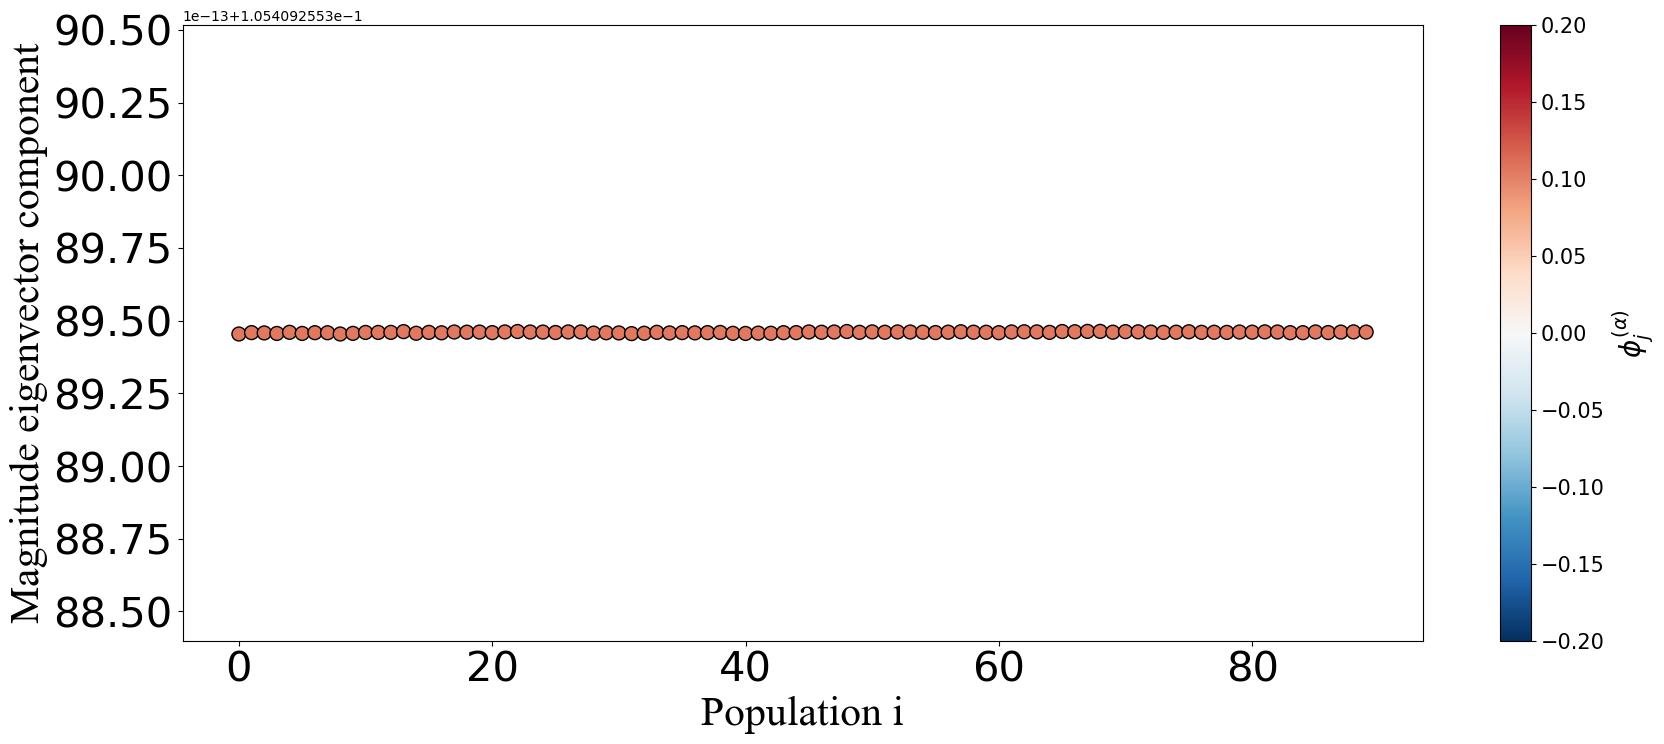

In [59]:
fig1=plt.figure(figsize=(20,8))
ax=plt.axes()
plt.scatter(np.arange(len(vep1)), vep1,s=100, c=vep1, cmap='RdBu_r', edgecolors='black', vmax=0.2, vmin=-0.2)
cbar=plt.colorbar()
cbar.set_label(r'$\phi_j^{(\alpha)}$', fontsize=20,fontname='Times New Roman')
cbar.ax.tick_params(labelsize=15)
plt.xlabel('Population i',fontsize=30,fontname='Times New Roman')
plt.ylabel("Magnitude eigenvector component",fontsize=30,fontname='Times New Roman')
plt.xticks(fontsize=30)#,rotation=45)
plt.yticks(fontsize=30)

(array([0.10540926, 0.10540926, 0.10540926, 0.10540926, 0.10540926,
        0.10540926, 0.10540926, 0.10540926, 0.10540926]),
 [Text(0, 0.10540925533885001, '88.50'),
  Text(0, 0.105409255338875, '88.75'),
  Text(0, 0.1054092553389, '89.00'),
  Text(0, 0.105409255338925, '89.25'),
  Text(0, 0.10540925533895, '89.50'),
  Text(0, 0.10540925533897501, '89.75'),
  Text(0, 0.105409255339, '90.00'),
  Text(0, 0.10540925533902501, '90.25'),
  Text(0, 0.10540925533905, '90.50')])

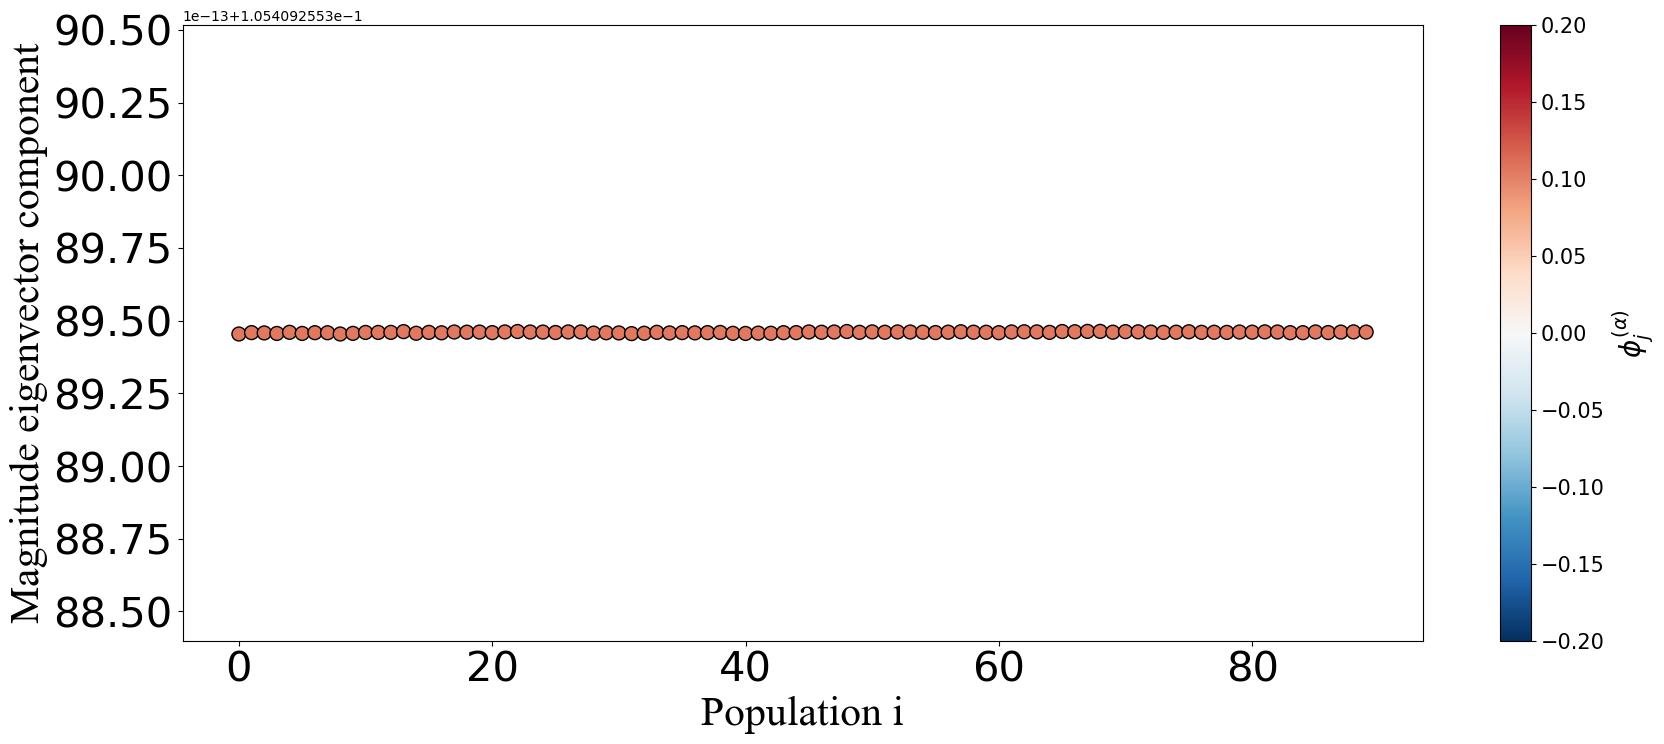

In [60]:
fig1=plt.figure(figsize=(20,8))
ax=plt.axes()
plt.scatter(np.arange(len(vep1)), vep1,s=100, c=vep1, cmap='RdBu_r', edgecolors='black', vmax=0.2, vmin=-0.2)
cbar=plt.colorbar()
cbar.set_label(r'$\phi_j^{(\alpha)}$', fontsize=20,fontname='Times New Roman')
cbar.ax.tick_params(labelsize=15)
plt.xlabel('Population i',fontsize=30,fontname='Times New Roman')
plt.ylabel("Magnitude eigenvector component",fontsize=30,fontname='Times New Roman')
plt.xticks(fontsize=30)#,rotation=45)
plt.yticks(fontsize=30)

In [79]:
vep2

array([ 0.10052244,  0.05731921,  0.09412914,  0.07683769,  0.11709738,
        0.14736457,  0.12415688,  0.14552485,  0.18859965,  0.04061628,
        0.06567144,  0.03299011,  0.03806286,  0.07441957,  0.15839414,
        0.02015033,  0.00737128, -0.00267224,  0.06485019,  0.09541661,
        0.09504719,  0.03144959,  0.02994475,  0.07643877,  0.04804998,
        0.11019707,  0.12750272,  0.12482796,  0.1210631 ,  0.0833061 ,
        0.14870523,  0.18116189,  0.16426379,  0.01483552,  0.02329216,
        0.07241329,  0.10661253,  0.08660876,  0.06166025,  0.19007279,
        0.19078044,  0.16470615,  0.16939331,  0.14365519,  0.14487183,
       -0.14669501, -0.12584082, -0.16036714, -0.14189624, -0.16507486,
       -0.15693616, -0.04884325, -0.07753925, -0.09682542, -0.03790256,
       -0.05427487, -0.04266233, -0.14914921, -0.1520352 , -0.14504532,
       -0.10135888, -0.10795161, -0.1245557 , -0.13166025, -0.13687674,
       -0.08182878, -0.08487404, -0.0598786 , -0.0581954 , -0.06

(array([-0.2 , -0.15, -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,
         0.25]),
 [Text(0, -0.2, '−0.20'),
  Text(0, -0.15000000000000002, '−0.15'),
  Text(0, -0.1, '−0.10'),
  Text(0, -0.04999999999999999, '−0.05'),
  Text(0, 0.0, '0.00'),
  Text(0, 0.04999999999999999, '0.05'),
  Text(0, 0.10000000000000003, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25')])

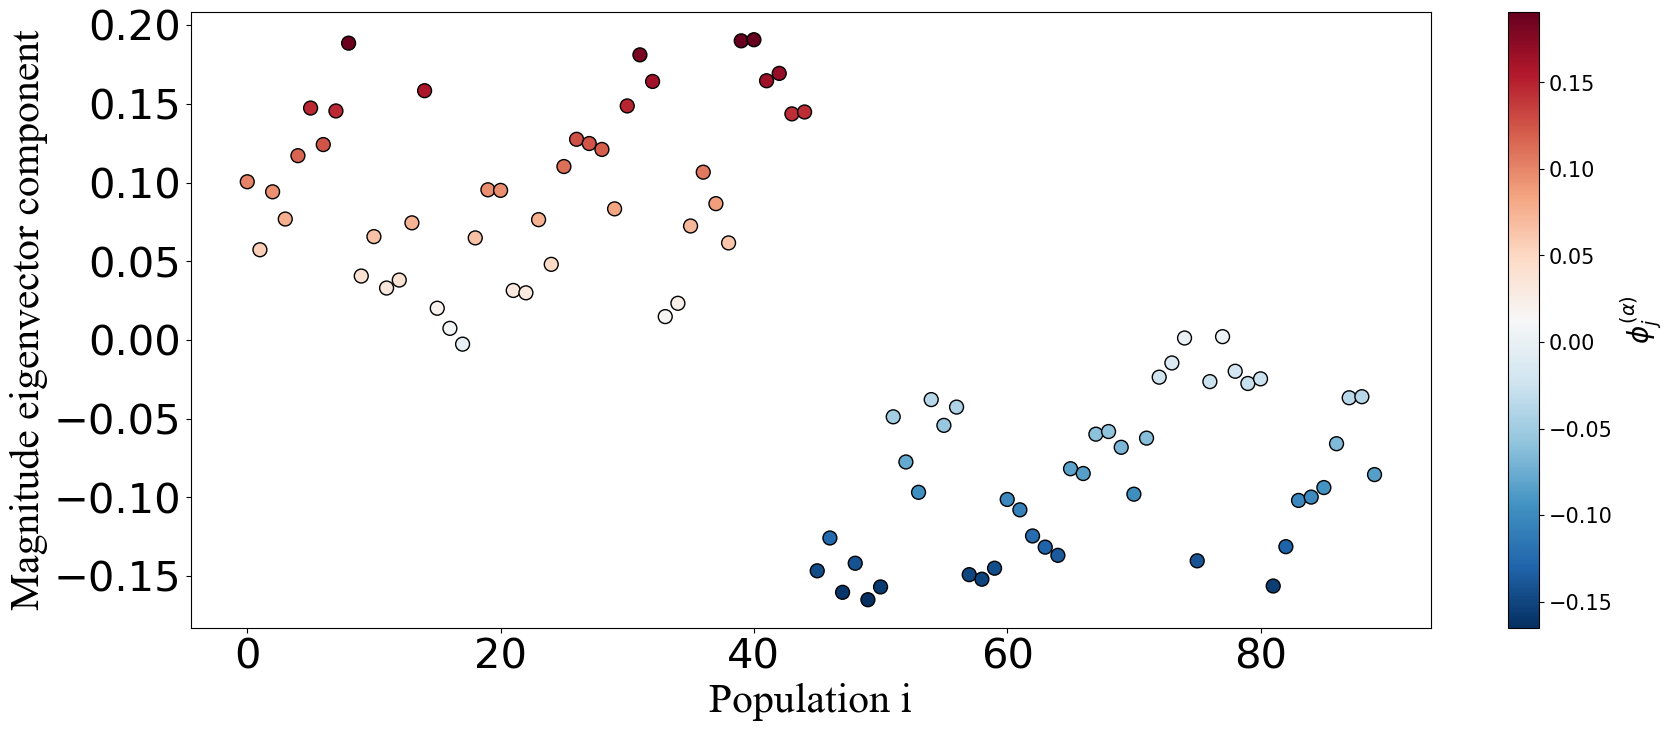

In [78]:
fig1=plt.figure(figsize=(20,8))
ax=plt.axes()
plt.scatter(np.arange(len(vep2)), vep2,s=100, c=vep2, cmap='RdBu_r', edgecolors='black')#, vmax=0.2, vmin=-0.2)
cbar=plt.colorbar()
cbar.set_label(r'$\phi_j^{(\alpha)}$', fontsize=20,fontname='Times New Roman')
cbar.ax.tick_params(labelsize=15)
plt.xlabel('Population i',fontsize=30,fontname='Times New Roman')
plt.ylabel("Magnitude eigenvector component",fontsize=30,fontname='Times New Roman')
plt.xticks(fontsize=30)#,rotation=45)
plt.yticks(fontsize=30)

(array([-0.25, -0.2 , -0.15, -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,
         0.2 ]),
 [Text(0, -0.25, '−0.25'),
  Text(0, -0.2, '−0.20'),
  Text(0, -0.15, '−0.15'),
  Text(0, -0.09999999999999998, '−0.10'),
  Text(0, -0.04999999999999999, '−0.05'),
  Text(0, 0.0, '0.00'),
  Text(0, 0.050000000000000044, '0.05'),
  Text(0, 0.10000000000000003, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20')])

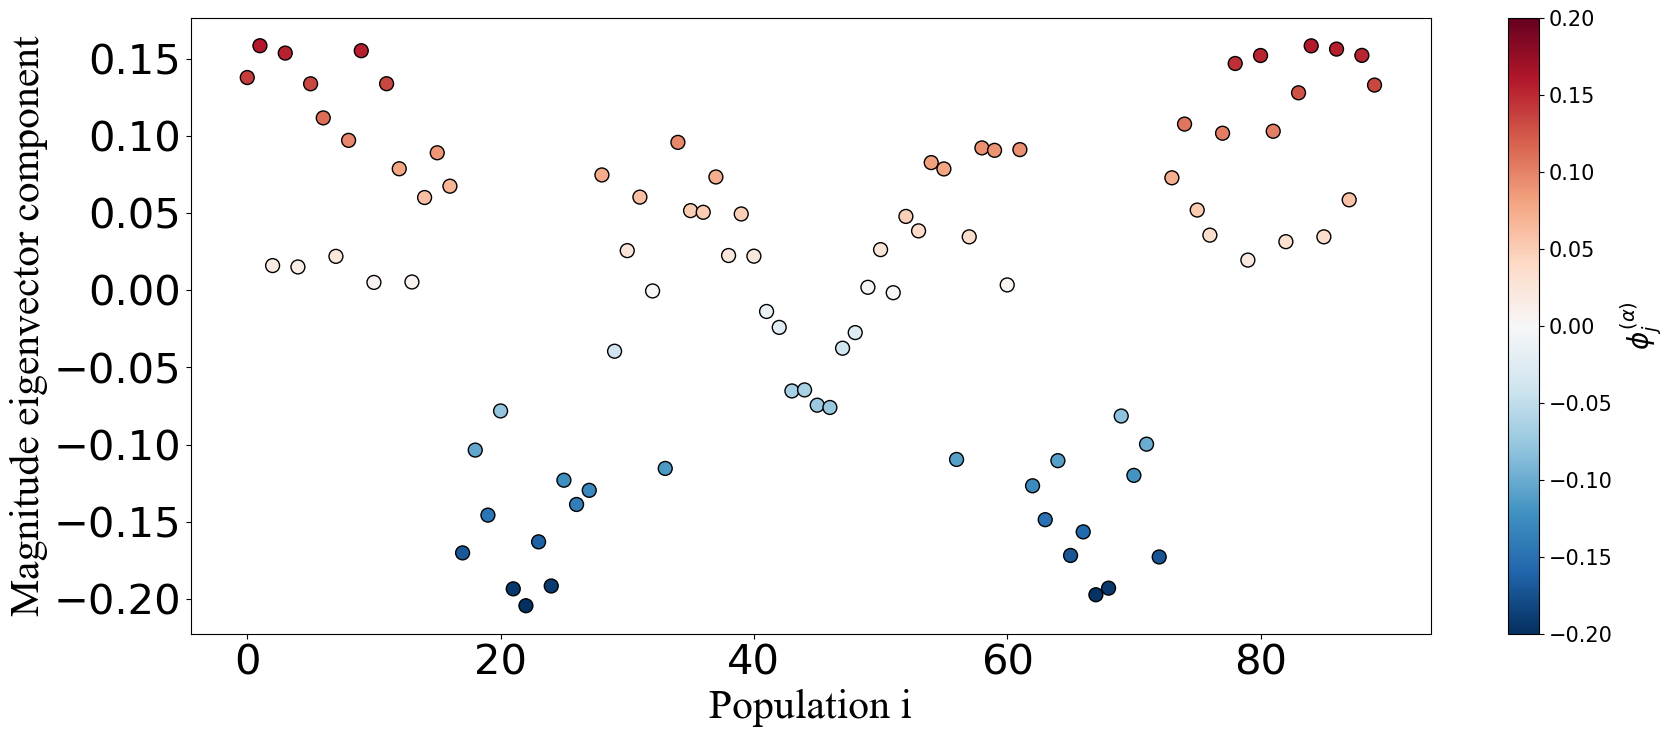

In [64]:
fig1=plt.figure(figsize=(20,8))
ax=plt.axes()
plt.scatter(np.arange(len(vep3)), vep3,s=100, c=vep3, cmap='RdBu_r', edgecolors='black', vmax=0.2, vmin=-0.2)
cbar=plt.colorbar()
cbar.set_label(r'$\phi_j^{(\alpha)}$', fontsize=20,fontname='Times New Roman')
cbar.ax.tick_params(labelsize=15)
plt.xlabel('Population i',fontsize=30,fontname='Times New Roman')
plt.ylabel("Magnitude eigenvector component",fontsize=30,fontname='Times New Roman')
plt.xticks(fontsize=30)#,rotation=45)
plt.yticks(fontsize=30)

(array([-0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3]),
 [Text(0, -0.30000000000000004, '−0.3'),
  Text(0, -0.20000000000000004, '−0.2'),
  Text(0, -0.10000000000000003, '−0.1'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.09999999999999998, '0.1'),
  Text(0, 0.19999999999999996, '0.2'),
  Text(0, 0.30000000000000004, '0.3')])

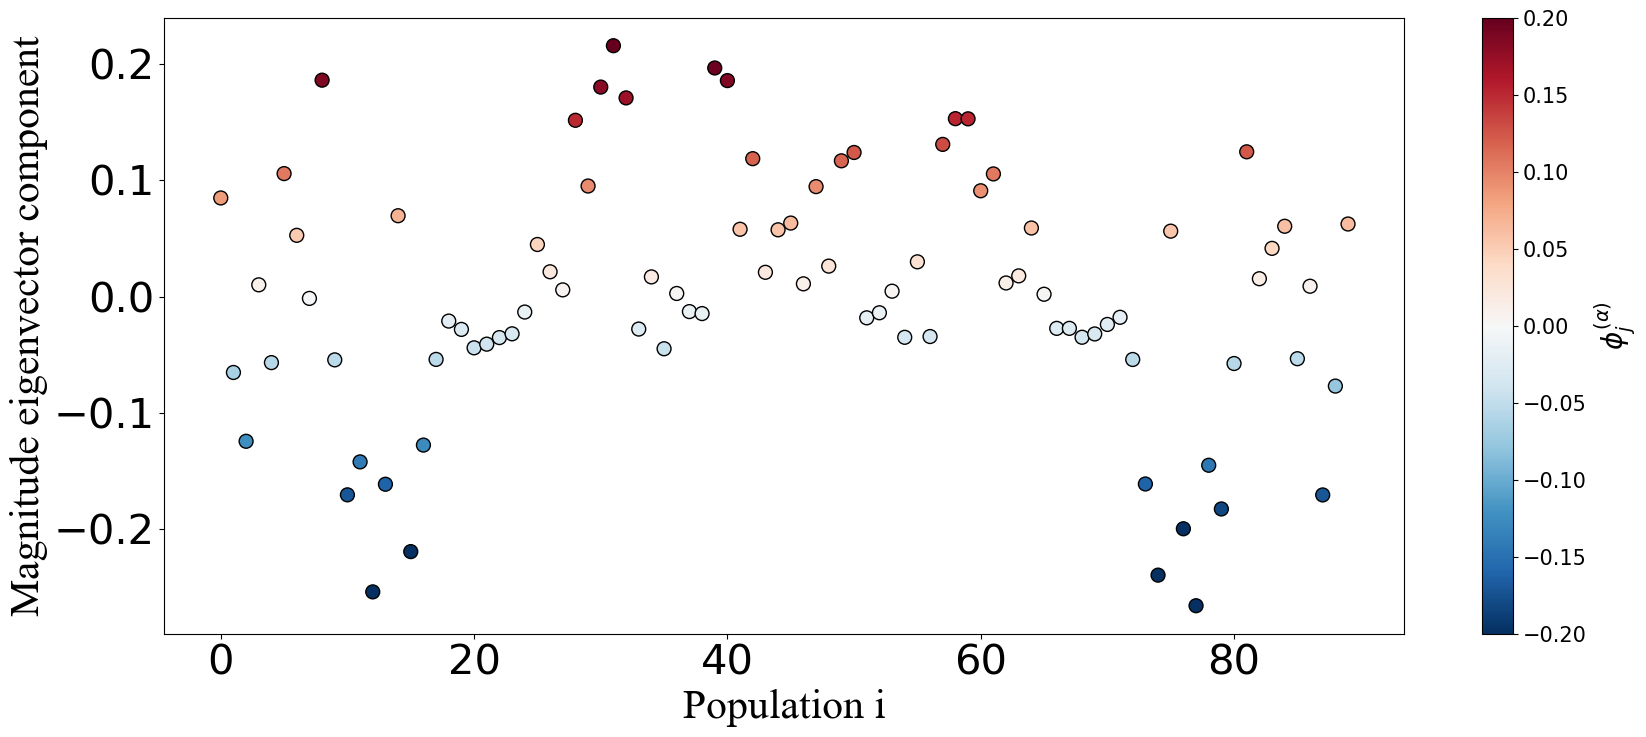

In [65]:
fig1=plt.figure(figsize=(20,8))
ax=plt.axes()
plt.scatter(np.arange(len(vep4)), vep4,s=100, c=vep4, cmap='RdBu_r', edgecolors='black', vmax=0.2, vmin=-0.2)
cbar=plt.colorbar()
cbar.set_label(r'$\phi_j^{(\alpha)}$', fontsize=20,fontname='Times New Roman')
cbar.ax.tick_params(labelsize=15)
plt.xlabel('Population i',fontsize=30,fontname='Times New Roman')
plt.ylabel("Magnitude eigenvector component",fontsize=30,fontname='Times New Roman')
plt.xticks(fontsize=30)#,rotation=45)
plt.yticks(fontsize=30)